In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('sleep_tracker.csv').dropna()

#data2 = data.copy()
#data2['total sleep time'] = data2['total sleep time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
data['naps taken in preceding day'] = data['naps taken in preceding day'].apply(lambda x: 'no' if x == 0 else 'yes')

data['length of nap(s)'] = data['length of nap(s)'].str.replace(' min', '')
data['length of nap(s)'] = data['length of nap(s)'].astype(int)
data['quality of sleep'] = data['quality of sleep'].astype(int)

data = data.rename(columns={'total sleep time': 'total_sleep_time', 'length of nap(s)': 'length of nap(s) (min)', 'naps taken in preceding day': 'Naps Taken?'})
data.head()

,date (night of),location,sleep partner?,time to bed,time u woke up,total_sleep_time,quality of sleep,woke up?,remember dream?,Naps Taken?,length of nap(s) (min),infirmities
0,2/2/23,dorm,yes,12:05:00 AM,7:00:00 AM,6:55:00,2,yes,no,no,0,none
1,2/3/23,dorm,no,1:00:00 AM,9:36:00 AM,8:36:00,4,no,no,yes,10,none
2,2/4/23,dorm,no,12:30:00 AM,9:30:00 AM,9:00:00,3,no,no,no,0,none
3,2/5/23,dorm,no,1:00:00 AM,7:00:00 AM,6:00:00,4,no,no,no,0,none
4,2/6/23,dorm,yes,1:00:00 AM,9:30:00 AM,8:30:00,3,yes,no,no,0,none


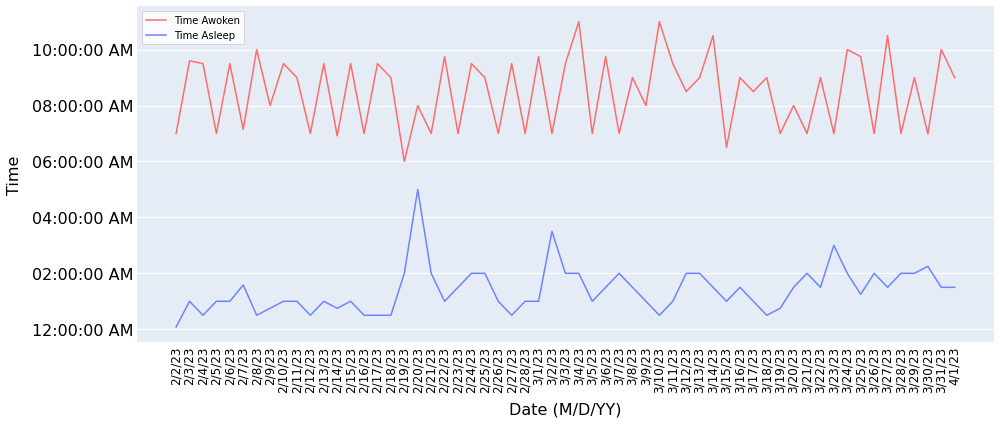

In [8]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.patch.set_facecolor('#E5ECF6')
data['time to bed'] = pd.to_datetime(data['time to bed'], format = '%I:%M:%S %p')
data['time u woke up'] = pd.to_datetime(data['time u woke up'], format = '%I:%M:%S %p')

ax.plot(data['date (night of)'], data['time u woke up'], label = 'Time Awoken', c = '#ff6b6b')
ax.plot(data['date (night of)'], data['time to bed'], label = 'Time Asleep', c = '#6b84ff')

ax.yaxis.set_major_formatter(mdates.DateFormatter('%I:%M:%S %p'))
[ax.spines[i].set_visible(False) for i in ax.spines]

ax.set_xlabel('Date (M/D/YY)', fontsize = 16, labelpad = 10)
ax.set_ylabel('Time', fontsize = 16, labelpad = 10)
ax.grid(axis = 'y', color = 'white', linewidth = 1.2, linestyle = '-')

plt.xticks(rotation = 90)
ax.tick_params(axis='x', labelsize = 12, size = 0)  
ax.tick_params(axis='y', labelsize = 16, size = 0)  

plt.legend()
plt.tight_layout()
plt.savefig('time_series')
plt.show()